# Homework for week 2

**Data:** In this homework, we will use the New York City Airbnb Open Data from [kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)

**Objective:** The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

## Setup

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [107]:
df = pd.read_csv("../data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis (EDA)

Question: Look at the price variable. Does it have a long tail?

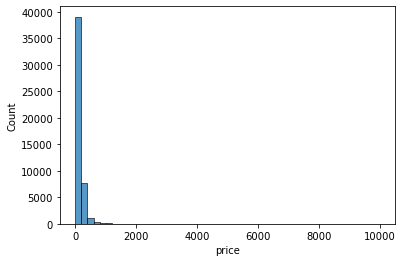

In [108]:
sns.histplot(df["price"], bins=50);

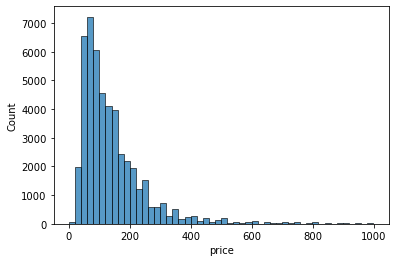

In [109]:
sns.histplot(df["price"][df["price"] < 1000], bins=50);

Answer: Yes, it does have a long tail

In [110]:
# Extract the necessary columns
features = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']

In [111]:
df_model = df[features]
df_model.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1

Find a feature with missing values. How many missing values does it have?

In [112]:
df_model.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Answer: The feature "reviews per month" has 10052 missing values.

### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [113]:
df_model["minimum_nights"].median()

3.0

Answer: The median of "minimum_nights" is 3.

### Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.

In [116]:
# Shuffle the data (seed 42)
length = len(df_model)
idx = np.arange(length)
print(idx)
np.random.seed(42)
np.random.shuffle(idx)
print(idx)

[    0     1     2 ... 48892 48893 48894]
[  879 44383 15394 ... 38158   860 15795]


In [117]:
df_model = df_model.iloc[idx]
df_model.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [118]:
# Split the data
n_val = int(length * 0.2)
n_test = n_val
n_train = length - 2*n_val

In [119]:
print(f"train length: {n_train}, val length {n_val}, test length {n_test}")

train length: 29337, val length 9779, test length 9779


In [120]:
df_train = df_model.iloc[:n_train]
df_val = df_model.iloc[n_train:n_train+n_val]
df_test = df_model.iloc[n_train+n_val:]

In [121]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [122]:
y_train = df_train["price"]
y_val = df_val["price"]
y_test = df_test["price"]
y_train

0         89
1         30
2        120
3        470
4        199
        ... 
29332     95
29333    101
29334    100
29335     68
29336     45
Name: price, Length: 29337, dtype: int64

In [123]:
# delete the target from the dataframe
del df_train["price"]
del df_val["price"]
del df_test["price"]

In [124]:
# apply log transformation
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

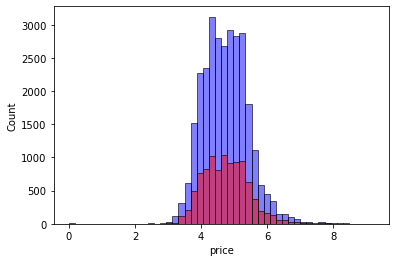

In [125]:
# plot y_train / y_val
sns.histplot(y_train, bins=50, color="blue", alpha=0.5)
sns.histplot(y_val, bins=50, color="red", alpha=0.5);

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [126]:
# Fill missing values 
def fill_X(df, fill=0):
    # fill missing values
    X = df.fillna(fill).values
    return X

In [127]:
X_train_fill0 = fill_X(df_train)
X_train_fill_mean = fill_X(df_train, fill=df_train.mean())
X_val = df_val.values

In [128]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
   
    return w_full[0], w_full[1:]

In [129]:
# fill 0
w0_fill0, w_fill0 = train_linear_regression(X_train_fill0, y_train)
print(f"fill with 0s: w0 {w0_fill0}, w {w_fill0}")
# fill mean
w0_fill_mean, w_fill_mean = train_linear_regression(X_train_fill_mean, y_train)
print(f"fill with 0s: w0 {w0_fill_mean}, w {w_fill_mean}")

fill with 0s: w0 -419.91265866086724, w [ 1.30676226e+00 -5.02167855e+00 -5.59803110e-04 -4.07634896e-04
 -8.25470066e-03  1.33371320e-03  6.50203890e-04]
fill with 0s: w0 -423.5393082023219, w [ 1.31148321e+00 -5.06799071e+00 -4.87741552e-04 -6.63849280e-04
  5.34563274e-03  1.32706019e-03  6.38794182e-04]


**Case: Fill missing values with 0s**

In [130]:
# predictions for training
y_pred_train_fill0 = w0_fill0 + X_train.dot(w_fill0)
print(y_pred_train_fill0)
# predictions for validation
y_pred_val_fill0 = w0_fill0 + X_val.dot(w_fill0)
print(y_pred_val_fill0)

[4.7827747  4.45947456 4.89702082 ... 4.82048871 4.86944871 4.61612559]
[4.57853271 4.48375564 4.73586366 ... 4.77182321 4.75592014 4.78192004]


In [131]:
def rmse(y, y_pred):
    error = (y - y_pred)**2
    rmse = np.sqrt(error.mean())
    return rmse

In [132]:
print(f"RMSE for training: {round(rmse(y_train, y_pred_train_fill0), 4)}")
print(f"RMSE for validation: {round(rmse(y_val, y_pred_val_fill0), 4)}")

RMSE for training: 0.6429
RMSE for validation: 0.6149


**Case: Fill missing values with mean**

In [133]:
# predictions for training
y_pred_train_fill_mean = w0_fill_mean + X_train.dot(w_fill_mean)
print(y_pred_train_fill_mean)
# predictions for validation
y_pred_val_fill_mean = w0_fill_mean + X_val.dot(w_fill_mean)
print(y_pred_val_fill_mean)

[4.76589611 4.44850272 4.89107725 ... 4.83526871 4.87768975 4.60682893]
[4.56404917 4.47586466 4.72706726 ... 4.76271671 4.74761535 4.81081466]


In [134]:
print(f"RMSE for training: {round(rmse(y_train, y_pred_train_fill_mean), 4)}")
print(f"RMSE for validation: {round(rmse(y_val, y_pred_val_fill_mean), 4)}")

RMSE for training: 0.6431
RMSE for validation: 0.6144


Answer: Filling missing values with the mean gives a lower RMSE.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [135]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
   
    return w_full[0], w_full[1:]

In [136]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    # fill missing values with 0
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    # prediction
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(f"r: {r}; RMSE: {round(score, 3)}")

r: 0; RMSE: 0.615
r: 1e-06; RMSE: 0.615
r: 0.0001; RMSE: 0.615
r: 0.001; RMSE: 0.615
r: 0.01; RMSE: 0.626
r: 0.1; RMSE: 0.647
r: 1; RMSE: 0.652
r: 5; RMSE: 0.652
r: 10; RMSE: 0.652


Answer: Several values for r give the same reults, when rounded on two digitals. The lowest is 1e-6.

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [137]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [146]:
length = len(df_model)
idx = np.arange(length)

def full_loop(df_model, seed):
    
    # Shuffle the data
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_model = df_model.iloc[idx]
    
    # split data
    df_train = df_model.iloc[:n_train]
    df_val = df_model.iloc[n_train:n_train+n_val]
    
    # fill missing values with 0
    X_train = df_train.fillna(0).values
    X_val = df_val.fillna(0).values
 
    y_train = df_train["price"]
    y_val = df_val["price"]
    
    # apply log transformation
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    
    # train linear regression
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)
        
    # make predictions
    y_pred = w0 + X_val.dot(w)
    
    # calculate rmse
    score  = rmse(y_val, y_pred)
    
    return score    

In [147]:
scores = []
for seed in seeds:
    
    score = full_loop(df_model, seed)
    scores.append(score)
    print(f"seed: {seed}, score: {score}")
    
# std of scores
std_scores = np.std(scores)
print(f"\nstd: {std_scores}")

seed: 0, score: 0.49295169951263423
seed: 1, score: 0.4809397273634807
seed: 2, score: 0.49618796412866817
seed: 3, score: 0.4876765315964381
seed: 4, score: 0.4964519786908811
seed: 5, score: 0.5252786500046434
seed: 6, score: 0.501665873587582
seed: 7, score: 0.4884128995760581
seed: 8, score: 0.5231415000731029
seed: 9, score: 0.5406866180177985

std: 0.01856724095509386


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [150]:
def final_test(df_model, seed=9):
    
    # Shuffle the data
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_model = df_model.iloc[idx]
    
    # split data
    df_train = df_model.iloc[:n_train+n_val]
    df_test = df_model.iloc[n_train+n_val:]
    
    # fill missing values with 0
    X_train = df_train.fillna(0).values
    X_test = df_test.fillna(0).values
    
    y_train = df_train["price"]
    y_test = df_test["price"]
    
    # apply log transformation
    y_train = np.log1p(y_train)
    y_test = np.log1p(y_test)
    
    # train linear regression
    w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
        
    # make predictions
    y_pred = w0 + X_test.dot(w)
    
    # calculate rmse
    score  = rmse(y_test, y_pred)
    return score 

In [151]:
score = final_test(df_model)
print(f"RMSE: {round(score, 3)}")

RMSE: 0.501


Answer: The RMSE with seed 9 and r=0.001 is lower than before.